In [14]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import logictensornetworks as ltn
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

In [40]:
df = pd.read_csv("/Users/eduard.hogea/Documents/Facultate/Internship/explorare/KNN99---LTN/datesets/CICIDS2017/Wednesday-workingHours.pcap_ISCX.csv", skipinitialspace = True)

In [30]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,286467.000000,2.864670e+05,286467.000000,286467.000000,286467.000000,2.864670e+05,286467.000000,286467.000000,286467.000000,286467.000000,...,286467.000000,286467.000000,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05
mean,8044.876324,5.379331e+06,3.473283,3.520500,233.407667,2.707247e+03,81.033369,10.352013,24.138688,24.590994,...,1.728618,29.075328,3.409213e+04,2.294987e+04,7.785722e+04,2.171380e+04,1.602973e+06,6.120390e+04,1.647188e+06,1.536286e+06
std,15378.583442,2.192364e+07,19.515131,28.288916,1865.523600,5.097783e+04,327.768035,24.237795,78.381542,117.218043,...,14.897361,8.014607,4.659319e+05,2.623049e+05,7.342606e+05,4.223145e+05,8.682334e+06,1.217016e+06,8.882728e+06,8.561545e+06
min,0.000000,-1.300000e+01,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,4.400000e+01,1.000000,1.000000,0.000000,6.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1110.000000,6.500000e+01,1.000000,1.000000,2.000000,6.000000e+00,2.000000,2.000000,2.000000,0.000000,...,0.000000,24.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6881.000000,2.380600e+04,2.000000,2.000000,62.000000,1.150000e+02,37.000000,6.000000,34.000000,0.000000,...,1.000000,40.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65389.000000,1.199999e+08,3119.000000,3635.000000,232349.000000,7.150819e+06,13929.000000,1472.000000,3412.938776,3541.466551,...,2056.000000,60.000000,1.100000e+08,7.050000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.050000e+07,1.200000e+08,1.200000e+08


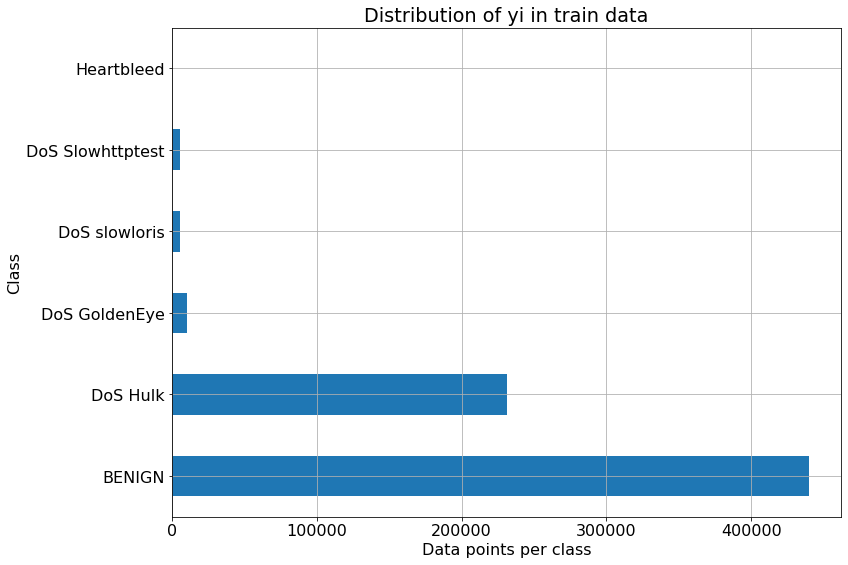

In [41]:
plt.figure(figsize=(12,9))
plt.rcParams.update({'font.size': 16})
class_distribution = df['Label'].value_counts()
class_distribution.plot(kind='barh')
plt.xlabel('Data points per class')
plt.ylabel('Class')
plt.title('Distribution of yi in train data')
plt.grid()
#plt.xlim([0, 100])
plt.show()

In [18]:
df.shape

(225745, 79)

In [19]:
df.drop_duplicates(keep= 'first', inplace=True) #eliminarea dublurilor liniilor
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()
print('Null values in dataset are',len(df[df.isnull().any(1)]))
df.shape

Null values in dataset are 0


(223082, 79)

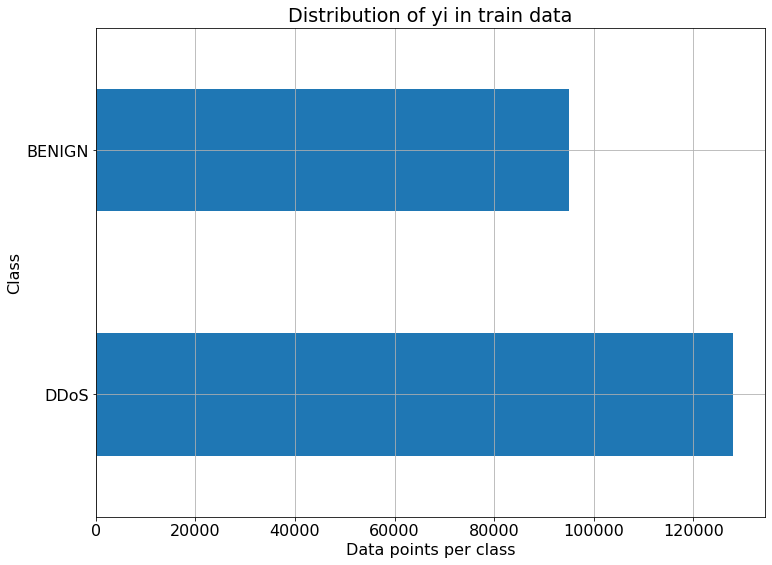

In [20]:
plt.figure(figsize=(12,9))
plt.rcParams.update({'font.size': 16})
class_distribution = df['Label'].value_counts()
class_distribution.plot(kind='barh')
plt.xlabel('Data points per class')
plt.ylabel('Class')
plt.title('Distribution of yi in train data')
plt.grid()
#plt.xlim([0, 100])
plt.show()

# Data normalization

In [21]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# selecting numeric attributes columns from data
numeric_col = df.select_dtypes(include='number').columns

In [22]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def normalization(df,col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
    return df

In [23]:
# calling the normalization() function
df = normalization(df.copy(),numeric_col)

# Data to tensor

In [11]:
# #No need for one-hot labeling
# for types in df.dtypes.unique():
#     print(types)
#     print(df.select_dtypes(types).columns)

In [24]:
column_array = []
for c in df.columns: 
    column_array.append(c)

In [25]:
df.shape
df = df.sample(frac=1)

In [26]:
features = df[column_array]
features.drop('Label', inplace = True, axis = 1)
label_label=df['Label']
#batch_size= 100
batch_size = 5000
ds_train = tf.data.Dataset.from_tensor_slices((features[:180000],label_label[:180000])).batch(batch_size)
ds_test = tf.data.Dataset.from_tensor_slices((features[180000:],label_label[180000:])).batch(batch_size)

Metal device set to: Apple M1


2022-05-05 17:07:04.761533: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-05 17:07:04.762343: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Creare Model

### Predicate

| index | class | 
| --- | --- |
| 0 | Heartbleed |
| 1 | DoS Slowhttptest |
| 2 | DoS slowloris |
| 3 | DoS GoldenEye |
| 4 | DoS Hulk |
| 5 | BENIGN(normal traffic) |

In [15]:
class MLP(tf.keras.Model):
    """Model that returns logits."""
    def __init__(self, n_classes, hidden_layer_sizes=(36,36,36,36,12)):
        super(MLP, self).__init__()
        self.denses = [tf.keras.layers.Dense(s, activation="elu") for s in hidden_layer_sizes]
        self.dense_class = tf.keras.layers.Dense(n_classes)
        
    def call(self, inputs):
        x = inputs
        for dense in self.denses:
            x = dense(x)
        return self.dense_class(x)

logits_model = MLP(6)
p = ltn.Predicate(ltn.utils.LogitsToPredicateModel(logits_model,single_label=False))

In [16]:
class_Heartbleed = ltn.Constant(0, trainable=False)
class_Dos_Slowhttptest = ltn.Constant(1, trainable=False)
class_Dos_slowloris = ltn.Constant(2, trainable=False)
class_DoS_GoldenEye = ltn.Constant(3, trainable=False)
class_DoS_Hulk = ltn.Constant(4, trainable=False)
class_BENIGN = ltn.Constant(5, trainable=False)

# Logica si Axioame
```
forall x_BENIGN: C(x_BENIGN,BENIGN): all the non-attacks should have label BENIGN
forall x_Dos_Slowhttptest: C(x_Dos_Slowhttptest,Dos_Slowhttptest): all the Dos Slowhttptest attacks should have label Dos Slowhttptest
forall x_Dos_slowloris: C(x_Dos_slowloris,Dos_slowloris): all the Dos slowloris attacks should have label Dos slowloris
forall x_DoS_GoldenEye: C(x_DoS_GoldenEye,DoS_GoldenEye): all the DoS GoldenEye attacks should have label DoS GoldenEye
forall x_DoS_Hulk: C(x_DoS_Hulk,DoS_Hulk): all the DoS Hulk attacks should have label DoS Hulk
forall x_Heartbleed: C(x_Heartbleed,Heartbleed): all the Heartbleed attacks should have label Heartbleed


add
forall x: ~(C(x,normal) & C(x,Dos)): if an example x is labelled as normal, it cannot be labelled as Dos too;
```

In [17]:
Not = ltn.Wrapper_Connective(ltn.fuzzy_ops.Not_Std())
And = ltn.Wrapper_Connective(ltn.fuzzy_ops.And_Prod())
Or = ltn.Wrapper_Connective(ltn.fuzzy_ops.Or_ProbSum())
Implies = ltn.Wrapper_Connective(ltn.fuzzy_ops.Implies_Reichenbach())
Equiv = ltn.Wrapper_Connective(ltn.fuzzy_ops.Equiv(ltn.fuzzy_ops.And_Prod(),ltn.fuzzy_ops.Implies_Reichenbach()))
Forall = ltn.Wrapper_Quantifier(ltn.fuzzy_ops.Aggreg_pMeanError(p=2),semantics="forall")
Exists = ltn.Wrapper_Quantifier(ltn.fuzzy_ops.Aggreg_pMean(p=6),semantics="exists")

In [18]:
formula_aggregator = ltn.Wrapper_Formula_Aggregator(ltn.fuzzy_ops.Aggreg_pMeanError(p=2))

@tf.function
def axioms(features,label_label):
    x = ltn.Variable("x",features)
    x_BENIGN = ltn.Variable("x_BENIGN",features[label_label=="BENIGN"])
    x_DoS_Hulk = ltn.Variable("x_DoS_Hulk",features[label_label=="DoS Hulk"])
    x_DoS_GoldenEye = ltn.Variable("x_DoS_GoldenEye",features[label_label=="DoS GoldenEye"])
    x_Dos_slowloris = ltn.Variable("x_Dos_slowloris",features[label_label=="Dos slowloris"])
    x_Dos_Slowhttptest = ltn.Variable("x_Dos_Slowhttptest",features[label_label=="Dos Slowhttptest"])
    x_Heartbleed = ltn.Variable("x_Heartbleed",features[label_label=="Heartbleed"])
    
    
    axioms = [
        Forall(x_BENIGN, p([x_BENIGN,class_BENIGN])),
        Forall(x_DoS_Hulk, p([x_DoS_Hulk,class_DoS_Hulk])),
        Forall(x_DoS_GoldenEye, p([x_DoS_GoldenEye,class_DoS_GoldenEye])),
        Forall(x_Dos_slowloris, p([x_Dos_slowloris,class_Dos_slowloris])),
        Forall(x_Dos_Slowhttptest, p([x_Dos_Slowhttptest,class_Dos_Slowhttptest])),
        Forall(x_Heartbleed, p([x_Heartbleed,class_Heartbleed])),
            
        Forall(x,Not(And(p([x,class_BENIGN]),p([x,class_DoS_Hulk])))),
        Forall(x,Not(And(p([x,class_BENIGN]),p([x,class_DoS_GoldenEye])))),
        Forall(x,Not(And(p([x,class_BENIGN]),p([x,class_Dos_slowloris])))),
        Forall(x,Not(And(p([x,class_BENIGN]),p([x,class_Dos_Slowhttptest])))),
        Forall(x,Not(And(p([x,class_BENIGN]),p([x,class_Heartbleed])))),
        
        Forall(x,Not(And(p([x,class_DoS_Hulk]),p([x,class_DoS_GoldenEye])))),
        Forall(x,Not(And(p([x,class_DoS_Hulk]),p([x,class_Dos_slowloris])))),
        Forall(x,Not(And(p([x,class_DoS_Hulk]),p([x,class_Dos_Slowhttptest])))),
        Forall(x,Not(And(p([x,class_DoS_Hulk]),p([x,class_Heartbleed])))),
        
        Forall(x,Not(And(p([x,class_DoS_GoldenEye]),p([x,class_Dos_slowloris])))),
        Forall(x,Not(And(p([x,class_DoS_GoldenEye]),p([x,class_Dos_Slowhttptest])))),
        Forall(x,Not(And(p([x,class_DoS_GoldenEye]),p([x,class_Heartbleed])))),
        
        Forall(x,Not(And(p([x,class_Dos_slowloris]),p([x,class_Dos_Slowhttptest])))),
        Forall(x,Not(And(p([x,class_Dos_slowloris]),p([x,class_Heartbleed])))),
        
        Forall(x,Not(And(p([x,class_Dos_Slowhttptest]),p([x,class_Heartbleed])))),
        
    ]
    sat_level = formula_aggregator(axioms).tensor
    return sat_level

In [19]:
for features, label_label in ds_train:
    print("Initial sat level %.5f"%axioms(features, label_label))
    break

2022-04-21 19:25:19.246128: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-21 19:25:19.246882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Initial sat level 0.71238


In [20]:
metrics_dict = {
    'train_sat_kb': tf.keras.metrics.Mean(name='train_sat_kb'),
    'test_sat_kb': tf.keras.metrics.Mean(name='test_sat_kb'),
    'train_accuracy': tf.keras.metrics.Mean(name="train_accuracy"),
    'test_accuracy': tf.keras.metrics.Mean(name="test_accuracy"),
    'test_sat_phi1': tf.keras.metrics.Mean(name='test_sat_phi1'),
    'test_sat_phi2': tf.keras.metrics.Mean(name='test_sat_phi2'),
    'test_sat_phi3': tf.keras.metrics.Mean(name='test_sat_phi3')
    #'test_sat_phi4': tf.keras.metrics.Mean(name='test_sat_phi4')
}



@tf.function()
def sat_phi1(features):
    x = ltn.Variable("x",features)
    phi1 = Forall(x, Implies(p([x,class_BENIGN]),Not(p([x,class_DoS_Hulk]))),p=5)
    #phi1 = Forall(x, Implies(p([x,class_normal]),Not(p([x,class_Dos]))),p=5)
    return phi1.tensor

@tf.function()
def sat_phi2(features):
    x = ltn.Variable("x",features)
    phi2 = Forall(x, Implies(p([x,class_BENIGN]),p([x,class_Heartbleed])),p=5)
    return phi2.tensor

@tf.function()
def sat_phi3(features):
    x = ltn.Variable("x",features)
    phi3 = Forall(x, Implies(p([x,class_BENIGN]),p([x,class_BENIGN])),p=5)
    return phi3.tensor

# @tf.function()
# def sat_phi4(features):
#     x = ltn.Variable("x",features)
#     phi4 = Forall(x, Implies(p([x,class_BENIGN]),p([x,class_DoS_GoldenEye])),p=5)
#     return phi4.tensor



def multilabel_hamming_loss(y_true, y_pred, threshold=0.5,from_logits=False):
    if from_logits:
        y_pred = tf.math.sigmoid(y_pred)
    y_pred = y_pred > threshold
    y_true = tf.cast(y_true, tf.int32)
    y_pred = tf.cast(y_pred, tf.int32)
    nonzero = tf.cast(tf.math.count_nonzero(y_true-y_pred,axis=-1),tf.float32)
    return nonzero/y_true.get_shape()[-1]

In [21]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
@tf.function
def train_step(features,label_label):
    # sat and update
    with tf.GradientTape() as tape:
        sat = axioms(features,label_label)
        loss = 1.-sat
    gradients = tape.gradient(loss, p.trainable_variables)
    optimizer.apply_gradients(zip(gradients, p.trainable_variables))
    metrics_dict['train_sat_kb'](sat)
    # accuracy
    predictions = logits_model(features)
    label_BENIGN = (label_label == "BENIGN")
    label_DoS_slowloris = (label_label == "DoS slowloris")
    label_DoS_Slowhttptest = (label_label == "DoS Slowhttptest")
    label_DoS_Hulk = (label_label == "DoS Hulk")
    label_DoS_GoldenEye = (label_label == "DoS GoldenEye")
    label_Heartbleed = (label_label == "Heartbleed")
    
    

    onehot = tf.stack([label_BENIGN,label_DoS_slowloris,label_DoS_Slowhttptest, label_DoS_Hulk, label_DoS_GoldenEye, label_Heartbleed],axis=-1)
    metrics_dict['train_accuracy'](1-multilabel_hamming_loss(onehot,predictions,from_logits=True))
    
@tf.function
def test_step(features,label_label):
    # sat
    sat_kb = axioms(features,label_label)
    metrics_dict['test_sat_kb'](sat_kb)
    metrics_dict['test_sat_phi1'](sat_phi1(features))
    metrics_dict['test_sat_phi2'](sat_phi2(features))
    metrics_dict['test_sat_phi3'](sat_phi3(features))
    #metrics_dict['test_sat_phi4'](sat_phi4(features))
    # accuracy
    predictions = logits_model(features)
    label_BENIGN = (label_label == "BENIGN")
    label_DoS_slowloris = (label_label == "DoS slowloris")
    label_DoS_Slowhttptest = (label_label == "DoS Slowhttptest")
    label_DoS_Hulk = (label_label == "DoS Hulk")
    label_DoS_GoldenEye = (label_label == "DoS GoldenEye")
    label_Heartbleed = (label_label == "Heartbleed")
    

    onehot = tf.stack([label_BENIGN,label_DoS_slowloris,label_DoS_Slowhttptest, label_DoS_Hulk, label_DoS_GoldenEye, label_Heartbleed],axis=-1)
    metrics_dict['test_accuracy'](1-multilabel_hamming_loss(onehot,predictions,from_logits=True))

In [22]:
from collections import defaultdict

def train(
        epochs,
        metrics_dict, 
        ds_train, 
        ds_test, 
        train_step, 
        test_step,
        track_metrics=1,
        csv_path=None,
        scheduled_parameters=defaultdict(lambda : {})
    ):
    """
    Args:
        epochs: int, number of training epochs.
        metrics_dict: dict, {"metrics_label": tf.keras.metrics instance}.
        ds_train: iterable dataset, e.g. using tf.data.Dataset.
        ds_test: iterable dataset, e.g. using tf.data.Dataset.
        train_step: callable function. the arguments passed to the function
            are the itered elements of ds_train.
        test_step: callable function. the arguments passed to the function
            are the itered elements of ds_test.
        csv_path: (optional) path to create a csv file, to save the metrics.
        scheduled_parameters: (optional) a dictionary that returns kwargs for
            the train_step and test_step functions, for each epoch.
            Call using scheduled_parameters[epoch].
    """
    template = "Epoch {}"
    for metrics_label in metrics_dict.keys():
        template += ", %s: {:.4f}" % metrics_label
    if csv_path is not None:
        csv_file = open(csv_path,"w+")
        headers = ",".join(["Epoch"]+list(metrics_dict.keys()))
        csv_template = ",".join(["{}" for _ in range(len(metrics_dict)+1)])
        csv_file.write(headers+"\n")
    
    for epoch in range(epochs):
        for metrics in metrics_dict.values():
            metrics.reset_states()

        for batch_elements in ds_train:
            train_step(*batch_elements,**scheduled_parameters[epoch])
        for batch_elements in ds_test:
            test_step(*batch_elements,**scheduled_parameters[epoch])

        metrics_results = [metrics.result() for metrics in metrics_dict.values()]
        if epoch%track_metrics == 0:
            print(template.format(epoch,*metrics_results))
        if csv_path is not None:
            csv_file.write(csv_template.format(epoch,*metrics_results)+"\n")
            csv_file.flush()
    if csv_path is not None:
        csv_file.close()

In [23]:
EPOCHS = 60
train(
    EPOCHS,
    metrics_dict,
    ds_train,
    ds_test,
    train_step,
    test_step,
    csv_path="results_attack.csv",
    track_metrics=1
)



2022-04-21 19:25:21.751072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-21 19:25:55.803191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-21 19:26:03.187968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 0, train_sat_kb: 0.8899, test_sat_kb: 0.9514, train_accuracy: 0.6491, test_accuracy: 0.6663, test_sat_phi1: 0.8139, test_sat_phi2: 0.1184, test_sat_phi3: 0.8722
Epoch 1, train_sat_kb: 0.9623, test_sat_kb: 0.9650, train_accuracy: 0.6655, test_accuracy: 0.6655, test_sat_phi1: 0.7766, test_sat_phi2: 0.0805, test_sat_phi3: 0.8819
Epoch 2, train_sat_kb: 0.9684, test_sat_kb: 0.9713, train_accuracy: 0.6656, test_accuracy: 0.6658, test_sat_phi1: 0.8231, test_sat_phi2: 0.0785, test_sat_phi3: 0.8858
Epoch 3, train_sat_kb: 0.9724, test_sat_kb: 0.9743, train_accuracy: 0.6661, test_accuracy: 0.6663, test_sat_phi1: 0.8369, test_sat_phi2: 0.0763, test_sat_phi3: 0.8870
Epoch 4, train_sat_kb: 0.9742, test_sat_kb: 0.9760, train_accuracy: 0.6662, test_accuracy: 0.6664, test_sat_phi1: 0.8280, test_sat_phi2: 0.0749, test_sat_phi3: 0.8873


KeyboardInterrupt: 

In [ ]:
#schimbat scaling, batch size, hidden layers